## CS231n Lecture_8 Pytorch and TensorFlow Notebook

In [1]:
import numpy as np
import tensorflow as tf

/Users/xuhaomin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [66]:
# Define

## create placeholder
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))

## build graph 
### forward pass(no compute)
h = tf.maximum(tf.matmul(x, w1), 0)
y_pred = tf.matmul(h, w2)
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
### tell tf to compute loss of gradient with respect to w1 and w2(no compute)
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# Run
loss_log = []
with tf.Session() as sess:
    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
              y: np.random.randn(N, D),}
    learning_rate = 2.5e-5
    for t in range(50):
        out = sess.run([loss, grad_w1, grad_w2],
                       feed_dict=values)
        loss_val, grad_w1_val, grad_w2_val = out
        values[w1] -= learning_rate * grad_w1_val
        values[w2] -= learning_rate * grad_w2_val
        loss_log.append(loss_val)


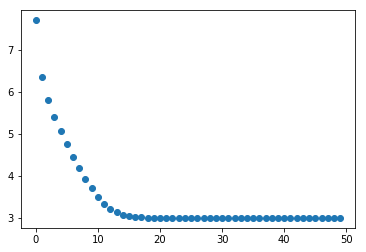

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([i for i in range(50)])
y = np.array([loss_val])
plt.plot(x, np.log10(loss_log), 'o')
plt.show()